# Bellabeat: How Can a Wellness Technology Company Play It Smart? 


## Ask
- About: 
Bellabeat, a high-tech manufacturer of health-focused products for women. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women. I'll be answering key business questions using the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

### Business Task
- Analyze smart device, Fitbit usage data 
- Gain insight into how consumers use non-Bellabeat smartdevices. 
- Provide recommendations on how trends can inform marketing strategy

### Stakeholders
- Urška Sršen (Co-founder and Chief Creative Officer)
- Sandro Mur (Co-founder and Chief Executive Officer)
- Marketing analytics team


## Prepare 
- The FitBit Fitness Tracker Data was provided which was sourced from Kaggle. 
   - It contains personal fitness tracker from 30 fitbit users.
   - Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
   - It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
- Date ranges from 12th April 2016 to 12th May 2016
- Stored in 18 CSV files 




## Process
- Data Cleanng and Transformation
  - Dropping the unwanted features in the dataframe
  - Checking for null values
  - Converting from numeric to datetime value
  - Merge dataframes

### Load the Data

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#import data
pwd = os.getcwd()
#daily
daily_activity = pd.read_csv(pwd + '/Fitabase_Data/dailyActivity_merged.csv', parse_dates=['ActivityDate'])
daily_sleep = pd.read_csv(pwd + '/Fitabase_Data/SleepDay_merged.csv', parse_dates=['SleepDay'])
#hourly data
hourly_calories = pd.read_csv(pwd + '/Fitabase_Data/hourlyCalories_merged.csv', parse_dates=['ActivityHour'])
hourly_intensities = pd.read_csv(pwd + '/Fitabase_Data/hourlyIntensities_merged.csv', parse_dates=['ActivityHour'])
hourly_steps = pd.read_csv(pwd + '/Fitabase_Data/hourlySteps_merged.csv', parse_dates=['ActivityHour'])

- The daily activity data has been merged with daily calories, daily intensities, daily steps data
- As minute level data is summarized in hourly and daily level data, it will be excluded from the analysis
- Due to small sample size (8 out of 31 users), 'weightLogInfo_merged.csv' and 'heartrate_seconds_merged' will be excluded from the analysis

In [15]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [17]:
daily_sleep.head()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [23]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [ ]:
hourly_intensities.head()

In [24]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [27]:
daily_activity.info()
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


-  I am going to merge the daily activity and daily sleep data together. They have date and Id in common.
- I'll so merge the  hourly dataframes together to create one dataframe for easy analysis

In [30]:
#daily dataframes merge
daily_df = pd.merge(daily_activity, daily_sleep, how= 'left', left_on= ['Id', 'ActivityDate'], right_on= ['Id', 'SleepDay'])

#hourly datsframes merge
hourly_df = pd.merge(hourly_calories, hourly_intensities, how='outer', on=['Id', 'ActivityHour'])
hourly_df = pd.merge(hourly_df, hourly_steps, how='outer', on=['Id', 'ActivityHour'])


In [31]:
#checking to see id it merged well
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0


In [32]:
hourly_df.head()
#looks good!

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


In [34]:
#drop duplicates
daily_df = daily_df.drop_duplicates(keep='first')
hourly_df = hourly_df.drop_duplicates(keep='first')
daily_df.duplicated().any()
hourly_df.duplicated().any()

False

In [36]:
#check for null values
daily_df.isnull().sum()
hourly_df.isnull().sum()

Id                  0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64

## Analyze & share
 - Exploratory data analysis
   - Identify trends and relationships

In [43]:
hourly_df.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


In [37]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0


In [40]:
daily_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000,410.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1.119512,419.173171,458.482927
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.346636,118.635918,127.455140
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000,361.000000,403.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1.000000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000


- Observations
    - Average daily steps is 7638, which is lower than the recommended 10,000 steps per day
    - Average daily calories burned is 2303, which is between the recommended daily calories intake for men (2500) and women (2000)
    - Average daily sendatary minutes is 991 minutes (16 hours), much longer than the average daily minutes asleep of 419 minutes (6.9 hours)
    - Average daily minutes asleep is 419 minutes(6.9 hours) which is below the recommended amount of sleep of at least 8 hours
    - Difference between average daily time in bed is longer than average daily time asleep by 39 minutes

- Correlation

<AxesSubplot:>

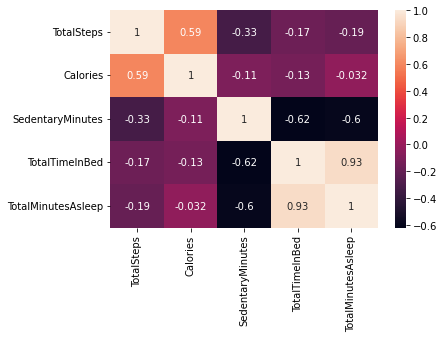

In [52]:
sns.heatmap(daily_df[['TotalSteps','Calories', 'SedentaryMinutes', 'TotalTimeInBed', 'TotalMinutesAsleep']].corr(), annot = True)

- Observation
    - There is a positive correlation between total steps taken and calories burned
    - Strong positive correlation between time in bed and time asleep
    - No correlation between calories burned and amount of sedentary time
    - negative correlation between Sedentary minutes and total minutes asleep



Total steps vs calories burned

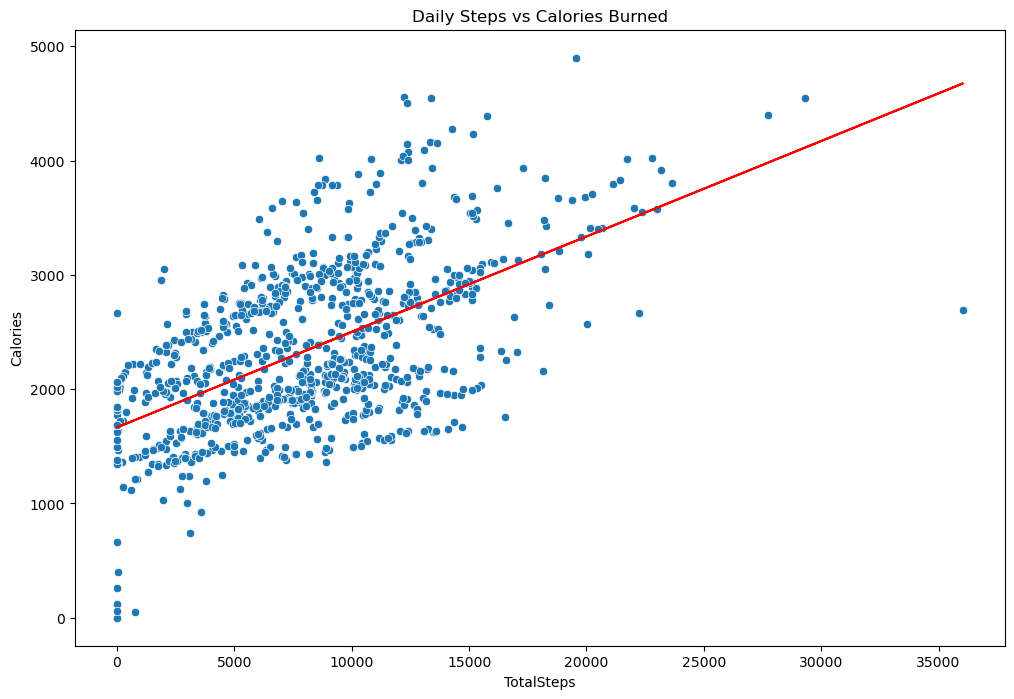

In [184]:
plt.figure(figsize=[12,8])
sns.scatterplot(data = daily_df, x = 'TotalSteps', y= 'Calories')
plt.title('Daily Steps vs Calories Burned')
z = np.polyfit(daily_df.TotalSteps, daily_df.Calories, 1)
p = np.poly1d(z)
plt.plot(daily_df.TotalSteps, p(daily_df.TotalSteps), 'red')
plt.show()

- Observation
    - Positive correlation between total steps taken and calories burned
    - Amount of calories burned increase when users are at the range of > 0 to 15,000 steps w

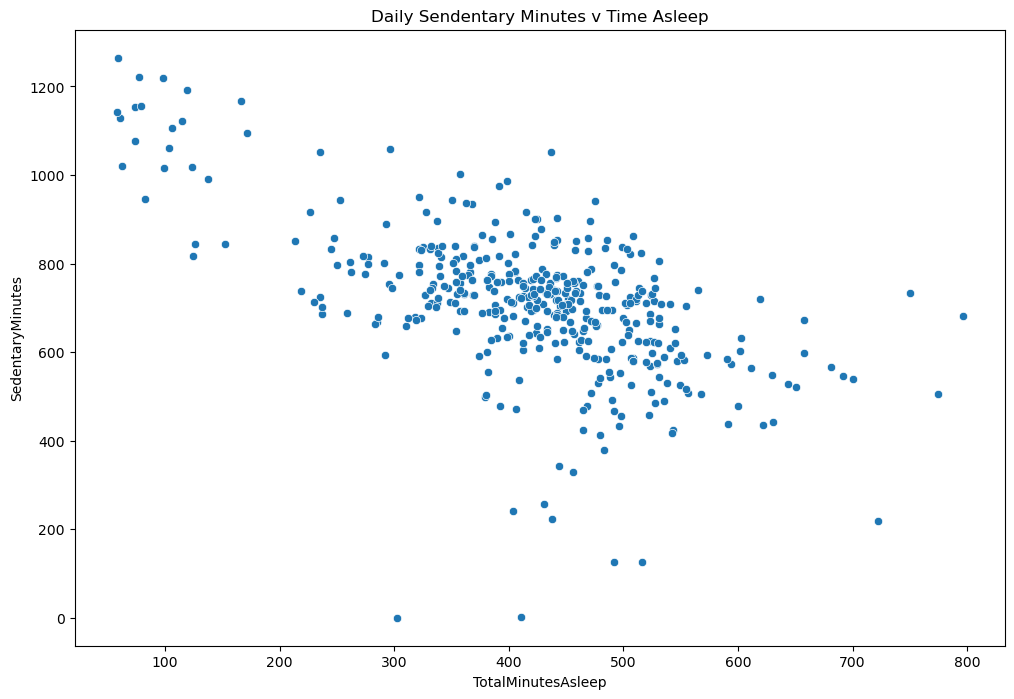

In [188]:
plt.figure(figsize=[12,8])
sns.scatterplot(data = daily_df, x = 'TotalMinutesAsleep', y= 'SedentaryMinutes')
plt.title('Daily Sendentary Minutes v Time Asleep')
plt.show()

- Observation
    - If the wearer was more sedentary during the day, less time spent asleep. So this means that reducing Sedentary minutes by being active can increase Total Minutes asleep, thus improving sleep.

In [53]:
daily_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

#### No. of times users logged into the app during the week

Text(0.5, 1.0, 'No. of times users logged into the app')

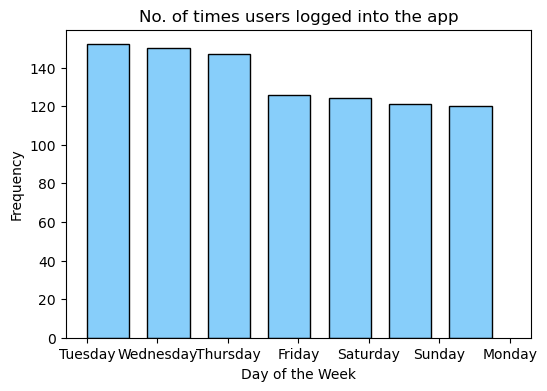

In [91]:
daily_df.ActivityDate.dt.day_name()
# daily_df.ActivityDate.dt.day_of_week
#sns.barplot(data = daily_df, x =)
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(daily_df.ActivityDate.dt.day_name(), bins = 7, width = 0.6, color = "lightskyblue", edgecolor = "black")
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('No. of times users logged into the app')


- Observation
    - Users seem to remember more to log into the app to track their activity from tuesday to thursday, higher frequency
    - frequency starts dropping on Friday to Monday
    
    

#### Activity level (Total steps) during the week

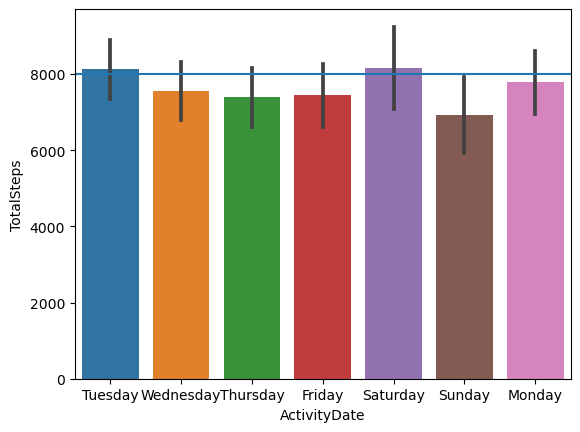

In [178]:
# Plot barchart DayOfWeek against TotalSteps 
sns.barplot(data=daily_df, x=daily_df.ActivityDate.dt.day_name(), y="TotalSteps")
plt.axhline(y=8000)

- Users tend to take more steps and are more active on Saturdays  and least active on Sunday.
- Slight decrease in activity as the weekday goes by

In [64]:
hourly_df.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


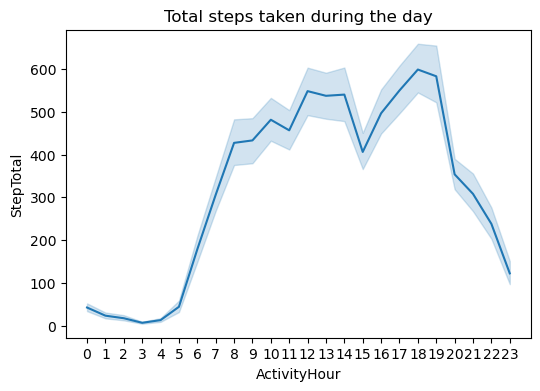

In [95]:
plt.figure(figsize=(6,4))
sns.lineplot(data= hourly_df, x=hourly_df.ActivityHour.dt.hour, y='StepTotal')
plt.title('Total steps taken during the day')
plt.xticks(hourly_df.ActivityHour.dt.hour.unique())
plt.show()


- Users are active from 8 am to 7pm 
-They tend to take more steps towards the end of the day from 6pm to 8pm and in the afternoon 12-2pm


#### Types of Users Based on their Activity Level 
<br> This data sets lacks demographic variable from which we can determine the types of users present. Therefore, I'll be classifyiing the users by activity level using the total number of steps taken. Here are the user categories:

- Sedentary - Less than 5000 steps a day.
- Lightly active - Between 5000 and 7499 steps a day.
- Fairly active - Between 7500 and 9999 steps a day.
- Active is more than 10,000 steps per day
- Very active - More than 12500 steps a day.
<br>  article https://www.10000steps.org.au/articles/counting-steps/




In [109]:
#daily average steps per user id
daily_average = daily_df.groupby(['Id']).mean()


In [162]:
#funtion to classify users by steps
def classify_user(row):
    if row < 5000:
        UserType = 'Sedentary'
    elif row >=5000 and row <=7499:
        UserType = 'Lightly active'
    elif row >=7500 and row <=9999:
        UserType = 'Fairly active'
    elif row >=10000 and row <12500:
        UserType = 'Active'
    else:
        UserType = 'Very active'
    return UserType


In [164]:
daily_average['UserType'] = daily_average['TotalSteps'].apply(classify_user)

In [165]:
daily_average.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,UserType
Id,,,,,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,1.08,360.28,383.2,Active
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839,NaN,NaN,NaN,Lightly active
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000,1.00,294.00,346.0,Lightly active
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871,1.00,652.00,961.0,Sedentary
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452,1.60,417.00,437.8,Sedentary


In [166]:
daily_average.sort_values(by= 'TotalSteps', ascending=False).head(8)

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,UserType
Id,,,,,,,,,,,,,,,,,
8877689391,16040.032258,13.212903,13.212903,0.000000,6.637419,0.337742,6.188710,0.005161,66.064516,9.935484,234.709677,1112.870968,3420.258065,NaN,NaN,NaN,Very active
8053475328,14763.290323,11.475161,11.475161,0.000000,8.514839,0.423871,2.533871,0.000000,85.161290,9.580645,150.967742,1148.000000,2945.806452,1.000000,297.000000,301.666667,Very active
1503960366,12116.741935,7.809677,7.809677,0.000000,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,1.080000,360.280000,383.200000,Active
2022484408,11370.645161,8.084193,8.084193,0.000000,2.421613,0.720000,4.942581,0.000000,36.290323,19.354839,257.451613,1112.580645,2509.967742,NaN,NaN,NaN,Active
7007744171,11323.423077,8.015385,7.575769,2.118673,2.415000,0.738462,4.861538,0.000769,31.038462,16.269231,280.730769,1055.346154,2544.000000,1.000000,68.500000,71.500000,Active
3977333714,10984.566667,7.517000,7.517000,0.000000,1.615000,2.751000,3.134333,0.000000,18.900000,61.266667,174.766667,707.533333,1513.666667,1.142857,293.642857,461.142857,Active
4388161847,10813.935484,8.393226,8.393226,0.000000,1.719355,0.901935,5.396129,0.000000,23.161290,20.354839,229.354839,836.677419,3093.870968,1.304348,400.173913,423.217391,Active
6962181067,9794.806452,6.585806,6.519355,0.323700,1.616452,0.960000,4.001613,0.006774,22.806452,18.516129,245.806452,662.322581,1982.032258,1.096774,448.000000,466.129032,Fairly active


In [159]:
len(daily_average[(daily_average['TotalSteps'] >= 10000) & (daily_average['TotalSteps'] <= 12500)])

#df[ (df['balance'] >= 100) & (df['balance'] <= 200) ] 

5

In [171]:
user_count = daily_average.UserType.value_counts()
user_count

Lightly active    9
Fairly active     9
Sedentary         8
Active            5
Very active       2
Name: UserType, dtype: int64

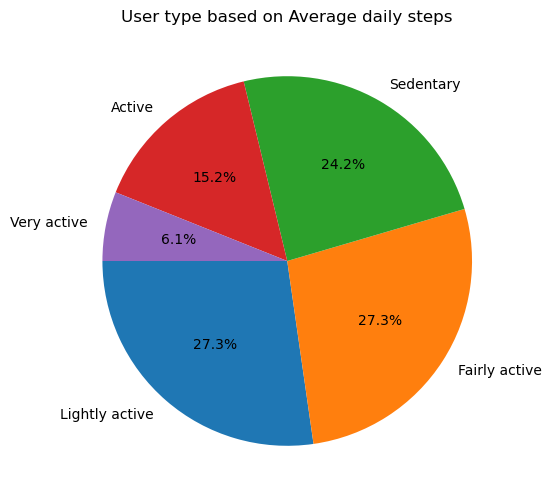

In [170]:
#visualize the porportion of genders
fig = plt.figure(figsize=(12,6))
plt.title('User type based on Average daily steps')
plt.pie(user_count, labels = user_count.index, autopct='%1.1f%%', startangle =180)
fig.set_facecolor('white')

Text(0.5, 1.0, 'Minutes Asleep per Weekday')

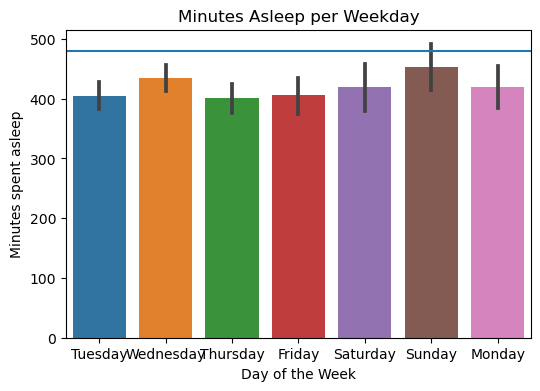

In [177]:
#bar plot showing minutes asleep during the week
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
sns.barplot(x = daily_df.ActivityDate.dt.day_name(), y =daily_df.TotalMinutesAsleep)
plt.axhline(y=480)
plt.xlabel('Day of the Week')
plt.ylabel('Minutes spent asleep')
plt.title('Minutes Asleep per Weekday')

## Act
#### <br>Key Insights
1. I classified users into 4 categories based on how many steps they take. On average, users walk 7--- daily besides Sunday. This is les than the daily recommended steps.
2. At 10,00 steps users typical burn 2500 calories
3. Users generally sleep 6.9 hours a day which is less than the recommended amount of 8 hours
4. The more sedentary time a user spends the less time they spend sleeping at night
5. Users spend an average of 39 minutes on the bed before falling asleep
6. Users are more active (take more steps) on Saturdays and Tuesdays in the evenings
7. Users seem to remember more to log into the app to track their activity from tuesday to thursday, higher frequency and then thefrequency starts dropping on Friday to Monday
    



We classified users into 4 categories and saw that the average of users walk more than 7,500 steps daily besides Sundays. We can encourage customers to reach at least daily recommended steps by CDC - 8.000 sending them alarms if they haven't reached the steps and creating also posts on our app explaining the benefits of reaching that goal. As CDC explains the more steps you walk the lower is the mortality rate. We also saw a positive correlation between steps and calories.

#### Recommendations
 1. We can encourage our users to be more active by sendng them reminders about hitting their daily recommended steps. We can refer them tho posts/articles explaining the benefits
 2. In a addition to this We can also set up a reward based program where users who are more active get discounts. We can set up a challenge or competition amongst other users to be more active. Users will need to maintain their actitvity level and keep the momentum going to win discounts or earn stars
3. Based on results users generally sleep less than 8 hours a day. We can notify our users about medication techniques, decreasing screen time, relaxing music etc so they can get ready for bed.
4. During Sedentary time users can be notified to take short walks or reach their  activity goals for the day. This will encourage users to be more active through out the week





 #### Limitations
 1. Sample size of the data is quite small (33 users) and may not be an accurate representration of female users. The data set can be biased since we don't have demographic information about the users.
 2. Bellabeat is designed for women while FitBit designed for both genders since we know target users the marketing strategy should focus on them
 3. Data collected since 2016. Users' activity might have changed since then, hence data may not be as relevant
 